# Experiment Result Analysis


In [9]:
import json
from defines import EVAL_PATH, IMAGE_PATH, DATASET_PATH

from PIL import Image

import random

In [10]:
def eval_result(eval_dir, method_name, t = 5, grid_size = 5, top = None):
    print("{}: ".format(method_name))
    success = []
    failed = []
    total_exp = 0
    with open(f'{eval_dir}/{method_name}_ResNet50.json') as f:
        results = json.load(f)
        results = results[:top] if top != None else results
        total_exp = len(results)
        for res in results:
            true_label = res["true_label_idx"]
            perturbed_label = res["topk_indices"][0]
            if true_label == perturbed_label:
                failed.append(res)
            else:
                success.append(res)

    num_success = len(success)
    success_rate = num_success / total_exp
    print("Success: {}, Failed: {}, Total: {}".format(num_success, len(failed), num_success+len(failed)))

    total_conf = 0.0
    total_pixels = 0
    for exp in success:
        num_pixel = (exp["num_iteration"]+1) * t * (grid_size ** 2)
        perturbed_prob = exp["topk_probabilities"][0]
        total_conf += perturbed_prob
        total_pixels += num_pixel

    avg_pixels = total_pixels/num_success
    
    print("Success Rate: {:.5f}\nConf: {:.5f}\nAvg Percentage Pixels Perturbed: {:.5f}\n".format(success_rate, total_conf/num_success, avg_pixels/(296*224)))
    
    return success, failed

def get_example(method_name, success,  image_folder = f"/home/comps-shared/datasets/benchmark/images"):
    item = random.choice(success)

    org_name = item["input_name"]
    perturbed_name = "perturbed_" + item["input_name"]+".png"
    img_dir = f"{IMAGE_PATH}/{method_name}"

    perturbed_image = Image.open(f"{img_dir}/{perturbed_name}")
    print(perturbed_image.size)
    org_img = Image.open(f"{image_folder}/{org_name}")

    display(perturbed_image)
    display(org_img)

    return item

LocSearchAdv_ResNet: 
Success: 928, Failed: 72, Total: 1000
Success Rate: 0.92800
Conf: 0.29469
Avg Percentage Pixels Perturbed: 0.02046

(224, 275)


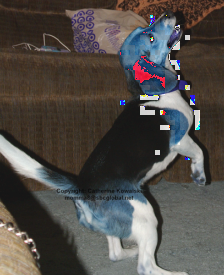

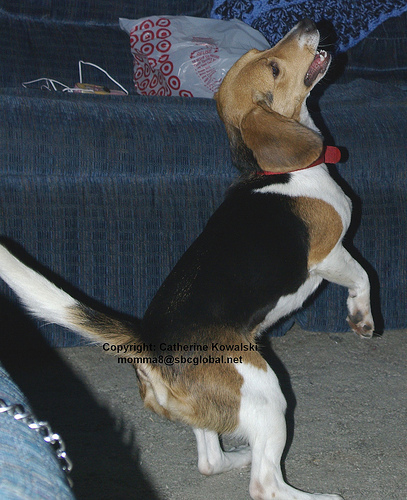

{'input_name': 'ILSVRC2012_val_00028602_n02088364.JPEG',
 'true_label': 'beagle',
 'true_label_idx': 162,
 'original_top1_index': 162,
 'original_true_class_probability': 0.9668758511543274,
 'true_class_probability': 0.12068218737840652,
 'topk_indices': [171, 162, 785, 180, 173],
 'topk_labels': ['Italian greyhound',
  'beagle',
  'seat belt, seatbelt',
  'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier',
  'Ibizan hound, Ibizan Podenco'],
 'topk_probabilities': [0.12433458864688873,
  0.12068218737840652,
  0.09862577170133591,
  0.09060733765363693,
  0.07040330022573471],
 'num_iteration': 27}

In [30]:
name = "LocSearchAdv_ResNet"
success, failed = eval_result(method_name = name, eval_dir = f"{EVAL_PATH}/{name}", grid_size=3)
get_example(name, success)

In [12]:
name = "Modified_LocSearchAdv"
success, failed = eval_result(method_name = name, eval_dir = f"{EVAL_PATH}/{name}")
get_example(name, success)

Modified_LocSearchAdv: 


FileNotFoundError: [Errno 2] No such file or directory: '/home/tut/RAdversarial/evals/Modified_LocSearchAdv/Modified_LocSearchAdv_ResNet50.json'

Org_LocSearchAdv: 
Success: 33, Failed: 67, Total: 100
Success Rate: 0.33000
Conf: 0.31115
Avg Percentage Pixels Perturbed: 0.00353



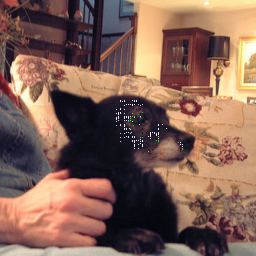

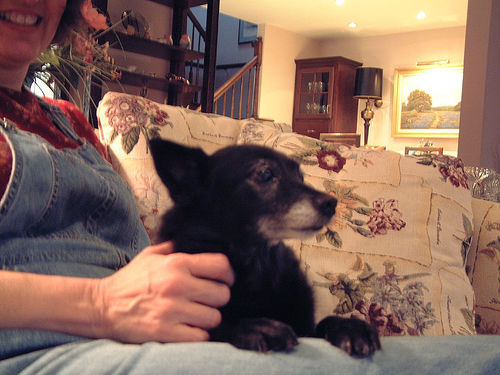

{'input_name': 'ILSVRC2012_val_00011873_n02104365.JPEG',
 'true_label_idx': 223,
 'original_true_class_probability': 0.6142798662185669,
 'true_class_probability': 0.2631833255290985,
 'topk_indices': [259, 223, 232],
 'topk_labels': ['Pomeranian', 'schipperke', 'Border collie'],
 'topk_probabilities': [0.2670882046222687,
  0.2631833255290985,
  0.0816357359290123],
 'num_iteration': 55}

In [ ]:
name = "Org_LocSearchAdv"
success, failed = eval_result(method_name = name, eval_dir = f"{EVAL_PATH}/{name}", grid_size=1)
get_example(name, success)